In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.stats.weightstats as smw
import scipy.stats as ss
import scikit_posthocs as sp

import warnings
warnings.filterwarnings("ignore")

In [2]:
da = pd.read_csv('CCSS_sample/nhanes_2015_2016.csv')
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
dx = da[["SMQ020x", "RIAGENDRx","BMXBMI"]].dropna()
dx.head()

,SMQ020x,RIAGENDRx,BMXBMI
0,Yes,Male,27.8
1,Yes,Male,30.8
2,Yes,Male,28.8
3,No,Female,42.4
4,No,Female,20.3


# Statistical Inference

How to use data to 
- <font color='blue'>estimate parameters with confidence</font>
    - estimate a population **Proportion** with confidence
    - estimate a population **Mean** with confidence
    - estimate a population **Mean Difference** with confidence
- <font color='blue'>test theories about parameters</font>
    - test a theory about **two population Means**
    - test a theory about **a population proportion**

# Statistical Inference with Confidence Intervals
- 
<font color='red'>
\begin{align} Estimate &\pm t_{\nu/2} * SE \nonumber\\
SE =& \sqrt{\frac{p(1-p)}{n}} ~~~~ (Proportion)\nonumber\\
SE =& \frac{\sigma}{\sqrt{n}} ~~~~~~~~~~~~~~~~~ (Mean) \nonumber\\
SE =& \sqrt{SE_1^2+SE_2^2} ~~~~ (Two~populations~Difference)\end{align}</font>

## Why Confidence Intervals?

**Confidence intervals** are a calculated range or boundary around a parameter or a statistic that is supported mathematically with a certain level of confidence.
- 95% confidence level refers to our **confidence in the statistical procedure** that was used to make this interval.

## How to Calculate Confidence Intervals?
<font color='blue'>$$Best\ Estimate \pm Margin\ of\ Error$$</font>

- Where the *Best Estimate* is the **observed population proportion or mean** and the *Margin of Error* is the **t_multiplier**.

- The t-multiplier is calculated based on the degrees of freedom and desired confidence level.  
For samples with more than 30 observations and a confidence level of 95%, the t-multiplier is 1.96.

The equation to create a 95% confidence interval can also be shown as:
<font color='blue'>$$Population\ Proportion\ or\ Mean\ \pm (t\_multiplier *\ Standard\ Error)$$</font>

- The Standard Error is calculated differently for population proportion and mean:
$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}} = \sqrt{\frac{p(1-p)}{n}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}} = \frac{\sigma}{\sqrt{n}}$$

## One popution
### Confidence intervals for one proportion
- statsmodels
```Python
statsmodels.stats.proportion_confint(     # 二项分布指标的率的可信区间的上下限
                count                                # 成功次数
                nobs                                 # 样本总数
                alpha = 0.5                          
                method = 'normal'                    # 可信区间的计算方法，正态近似法
                        'agresti_coull'              # Agresti-Coull interval
                        'beta'                 # clopper-pearson interval based on Beta distribution
                        'wilson'                     # wilson score interval
                        'jeffreys'                   # Jeffreys Bayesian interval
                        'binom_test')                # experimental, inversion of binom_test
``` 

<font color='blue'>**Question:**</font>
A sample of 659 parents with a toddles was taken and asked if they used a car seat for all travel with their toddler. 559 parents reponded Yes to this question. Construct a 95% confidence interval for the population proportion of parents reporting they use a car seat for all travel with their toddler.

In [4]:
# Use formular
t = 1.96
p = 559/659
n = 659
se = np.sqrt(p*(1-p)/n)

lb = p - t*se
ub = p + t*se
print('between',lb,'and',ub)

between 0.8208622940192611 and 0.8756475694101773


In [5]:
sm.stats.proportion_confint(559, 659,alpha = 0.05)

(0.8208627973654069, 0.8756470660640315)

- We estimated, with 95% confidence, that the population proportion of parents with a toddler that use a car seat for all travel with their toddler was somewhere between 82.2% and 87.7%.
- Essentially, if we repeat this process, **95% of our calculated confidence intervals would contain the true proportion**.

In [6]:
sm.stats.proportion_confint(559, 659,alpha = 0.05,method='binom_test')

(0.8188081653766461, 0.8742393415165308)

### Mean confidence interval:
- statsmodels
    - **t CI**
```Python
sm.stats.DescrStatsW(df["CWDistance"]).tconfint_mean(      # 计算均数的可信区间
                        alpha = 0.05
                        alternative = 'two-sided'） # 结果输出：可信区间的上下限                         
```
    - **z CI**
```Python
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean()
```


In [7]:
df = pd.read_csv("CCSS_sample/Cartwheeldata.csv")

In [8]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [9]:
mean = df["CWDistance"].mean()
sd = df["CWDistance"].std()
n = len(df)

t = 2.064
se = sd/np.sqrt(n)

lcb = mean - t * se
ucb = mean + t * se
(lcb, ucb)

(76.26382957453707, 88.69617042546294)

In [10]:
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean()

(76.57715593233026, 88.38284406766975)

In [11]:
sm.stats.DescrStatsW(df["CWDistance"]).tconfint_mean()

(76.26413507754478, 88.69586492245523)

## Two Population
The standard error for difference of population proportions and means is:

$$Standard\ Error\ for\ Difference\ of\ Two\ Population\ Proportions\ Or\ Means = \sqrt{SE_{Proportion\ 1}^2 + SE_{Proportion\ 2} ^2}$$

### Difference of Two Population Proportions

<font color='blue'>**Question:**</font> Analyze the difference of proportion between female and male smokers "SMQ020". 

In [12]:
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2044,1322
Yes,896,1390


In [13]:
p = 906/2972
n = 2972
se_female = np.sqrt(p * (1 - p)/n)
se_female

0.008444152146214435

In [14]:
p = 1413/2753
n = 2753
se_male = np.sqrt(p * (1 - p)/ n)
se_male

0.009526078653689868

In [15]:
se_diff = np.sqrt(se_female**2 + se_male**2)

d = 906/2972 - 1413/2753
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff
(lcb, ucb)

(-0.2333636091471941, -0.18346247413207697)

### Difference of Two Population Mean

- **CompareMeans Class**
```Python
class statsmodels.stats.weightstatsW.CompareMeans(d1,d2) # Both d1,d2 should be DescrStatsW formats
```
    - **tconfint_diff** & **zconfint_diff** Method
```Python
CompareMeans.tconfint_diff([alpha,alternative,usevar])      # 基于t-test的均数差值估计95%可信区间，
CompareMeans.zconfint_diff([alpha,alternative,usevar])      # 基于z-test的均数差值可信区间
```

<font color='blue'>**Question:**</font>
Analyze the difference of mean of body mass index within our female and male populations "BMXBMI". 

In [16]:
da["BMXBMI"].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [17]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

In [18]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)
(sem_female, sem_male)

(0.14212523289878048, 0.11903716451870151)

In [19]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
d = 29.939946 - 28.778072
lcb = d - 1.96 * sem_diff
ucb = d + 1.96 * sem_diff
(lcb, ucb)

(0.798509725476467, 1.5252382745235278)

In [20]:
female = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]


bmg1 = smw.DescrStatsW(female["BMXBMI"].dropna())   # female
bmg2 = smw.DescrStatsW(male["BMXBMI"].dropna())   # male   

smw.CompareMeans(bmg1,bmg2).tconfint_diff()

(0.7930478678957343, 1.5306992127582104)

In [21]:
smw.CompareMeans(bmg1,bmg2).zconfint_diff()

(0.7931267392647459, 1.530620341389199)

## Sample size
$\displaystyle p\pm z^*\sqrt{\frac{p(1-p)}{n}}$, when $p=1/2$, consevative Standard Error $\displaystyle=\frac{1}{2\sqrt{n}}$, for 95% confidence level, $z^*=1.96$, then margin of error is $\displaystyle\frac{1}{\sqrt{n}}$.
- Margin of Error (MoE) is only dependent on 
    - confidence level (typically 95%) 
    - sample size

<font color='red'>$\displaystyle \ n = (\frac{z^*}{2MoE})^2$</font>
- Estimated standard error may be too small, or inaccurate based of sample so can employ conservative approach
- conservative approach, determine sample size needed based on a confidence level and desired margin of error

Whar sample size would you need to have a 95% conservation confidence interval with a Margin of Error of only 4%?
n = (1.96/(2*0.04))**2, n=600.25

In [22]:
n = (1.96/(2*0.04))**2
n

600.25

# Hypothesis Testing
**Null Hypothesis: $H_0$**

**Alternative Hypothesis: $H_a$**
<font color='red'>
\begin{align} \displaystyle
    z\_score = &\frac{Best\ Estimate - Hypothesized\ Estimate}{Standard\ Error\ of\ Estimate}
\end{align}</font>
One can calculate the P_value with z_score. If P_value < 0.05, then rejecte H0.
    
## One Population Proportion
- statsmodels
```Python
statsmodels.stats.proportions_ztest(    # output( Z-statisticd, pvalue)
            count,                                 # 成功次数，单一数值/类数组结构列表
            nobs,                                  # 总样本量，单一数值/类数组结构列表
            value,                                 # H0对应的总体率/率差
            alternative = 'two-sided'
            prop_var = False                       # 指定方差分配比例，默认按照样本比例进行计算
            )
```
- 基于卡方的多项分布检验,**检验各个类别出现的概率是否相同**
```Python
statsmodels.stats.proportions_chisquare(     # output(chi2_value,pvalue,(table,expected value))
            count,           # 按列表形式给出各类别频数
            nobs,
            value)           # H0对应的总体率/率差
```
- 基于二项分布的确切检验
```Python
statsmodels.stats.binom_test(    # output: pvalue
            count,
            nobs,
            value,               # H0对应的总体率/率差
            alternative = 'two-sided')
```





<font color='blue'>**Question:**</font>
In previous years 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media? 

**Population**: Parents with a teenager (age 13-18)  
**Parameter of Interest**: p  
**Null Hypothesis:** p = 0.52  
**Alternative Hypthosis:** p > 0.52  

Today, 1018 Parents, 56% believe that their teenager’s lack of sleep is caused due to electronics and social media.

In [23]:
n = 1018
pnull = .52
phat = .56

In [24]:
z_score = (phat-pnull)/np.sqrt(phat*(1-phat)/n)
p_values = ss.norm.sf(abs(z_score))*2
(z_score,p_values)

(2.5710677957591126, 0.010138547731721084)

In [25]:
sm.stats.proportions_ztest(phat * n, n, pnull)

(2.571067795759113, 0.010138547731721065)

In [26]:
sm.stats.proportions_chisquare(phat * n, n, pnull)

(6.5256410256410335,
 0.010633021983644915,
 (array([[570.08, 447.92]]), array([[529.36, 488.64]])))

In [27]:
sm.stats.binom_test(phat * n, n, pnull)

0.01104402063287842

- **Z=2.57** That means that our observed sample proportion is 2.55 null standard errors above our hypothesized population proportion.
- **P_value=0.01** < $\alpha = 0.05$
- Reject the null hypothesis. 
- There is sufficient evidence to conclude that the population proportion of parents with a teenager who belive that electronics and social media is the cause for lack of sleep is greater than 52%.

## Difference in Population Proportions
- scipy

```Python
scipy.stats.chi2_contingency(
                observed             # 观察到的列联表，类二维数组结构
                correction = True    # 是否计算Yates校正的卡方结果
                lambda_ = None       # 换用Cressie-Read power divergence family 统计量
                )                    # 输出： 卡方值，P值，自由度，期望频数
```
- statsmodels
```Python
class statsmodels.stats.contingency_table.Table(table,shift_zeros=True) # 如果单元格频数为0，所有单元格频数+0.5防止计算出错
```
    - Table 类的属性

```Python
table_orig                       # 表格原始数据 
marginal_probabilities           # 估计的行列边际概率分布
independec_probabilities         # 基于行列独立的H0假设的单元格概率分布
fittedvalues                     # 期望频数

resid_pearson                    # Pearson残差
standardized_resid               # 标准化残差
chi2_contribs                    # 每个单元格的卡方贡献值
``` 
    - Table 类的方法

```Python
test_nominal_association()      # 无序分类行、列变量的独立性检验, 输出(卡方统计量，自由度，P值)
test_ordinal_association([row_scores,...])      # 有序分类行/列变量的独立性检验，Cochran_Armitage趋势检验
```

<font color='blue'>**Question:**</font>
247 Parents of Black Children
36.8% of parents report that their child has had some swimming lessons.
308 Parents of Hispanic Children
38.9% of parents report that their child has had some swimming lessons.

Is there a **significant difference** between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

**Populations**: All parents of black children age 6-18 and all parents of Hispanic children age 6-18  
**Parameter of Interest**: p1 - p2, where p1 = black and p2 = hispanic  

**Null Hypothesis:** p1 - p2 = 0  , **no significant difference**

**Alternative Hypthosis:** p1 - p2 $\neq$ 0  ,**has significant difference**

<font color='red'> $\displaystyle z\_score = \frac{p-p_0}{SE(p)}$    
SE is the standard error of estimate $\displaystyle SE = \sqrt{p(1-p)(\frac{1}{n_1}+\frac{1}{n_2})} $

In [28]:
p1 = 0.37
n1 = 247

p2 = 0.39
n2 = 308

p12 = p2-p1
sep =np.sqrt(p1*(1-p1)*(1.0/n1+1.0/n2)) 
z_score1 = (p1-p2)/sep
p_value1 = ss.norm.sf(abs(z_score1))*2 

print('z_score:',z_score1,'Pvalue:',p_value1)

z_score: -0.4849938172663346 Pvalue: 0.6276807312529116


- P_value=0.63 > 0.1. 
- Formally, based on our sample and our p-value, we fail to reject the null hypothesis. 
- We conclude that there is **no significant difference** between the population proportion of parents of black and Hispanic children.

**Chi-Square Test**

In [29]:
tb1 = pd.DataFrame([[91,156],[120,188]])
tb1.columns = ['Yes','No']
tb1

,Yes,No
0,91,156
1,120,188


In [30]:
# 看一下期望频数
ss.contingency.expected_freq(tb1)

array([[ 93.9045045, 153.0954955],
       [117.0954955, 190.9045045]])

In [31]:
ss.chi2_contingency(tb1,False)

(0.26117673621545673, 0.6093128715165168, 1, array([[ 93.9045045, 153.0954955],
        [117.0954955, 190.9045045]]))

- chi2 = 0.26, Pvalue = 0.61, 不能拒绝H0，no siginificant difference,degree of freedom = 1, 
- 期望频数（expected frequency）

**Statemodel**

## One Population Mean

-  Scipy
```Python
scipy.stats.ttest_1samp(
    a          # 类list格式的样本数据
    popmean    # H0所对应的总体均数
```
- statsmodels

```Python
sm.stats.DescrStatsW(df["CWDistance"]).ttest_mean(         # 进行单样本t检验
                        value = 0                   # H0所对应的总体均值
                        alternative = 'two-sided'/'larger'/'smaller')    # 结果输出：t值，P值，自由度    
```

<font color='blue'>**Question:**</font>

Is the average cartwheel distance (in inches) for adults 
more than 80 inches?

**Population**: All adults  
**Parameter of Interest**: $\mu$, population mean cartwheel distance.

**Null Hypothesis:** $\mu$ = 80

**Alternative Hypthosis:** $\mu$ > 80

25 Adults

$\mu = 82.46$

$\sigma = 15.06$

In [32]:
mu = 82.46
mu0 = 80
sigma = 15.06
n = 25
z = (mu-mu0)/(sigma/np.sqrt(n))
p = ss.norm.sf(abs(z)) 
print('z_score:',z,'Pvalue:',p)

z_score: 0.8167330677290816 Pvalue: 0.20704049479973047


In [33]:
df = pd.read_csv("CCSS_sample/Cartwheeldata.csv")
n = len(df)
mean = df["CWDistance"].mean()
sd = df["CWDistance"].std()
(n, mean, sd)

(25, 82.48, 15.058552387264855)

In [34]:
sm.stats.ztest(df["CWDistance"], value = 80, alternative = "larger")

(0.8234523266982029, 0.20512540845395266)

## Two Population Means Difference 
- Scipy
     - **from array**
```Python
scipy.stats.ttest_ind(               # 进行两样本t检验
                    a,b                    # 类数组格式的两组数据
                    equal_var = True       # 两组方差是否齐同，方差不齐时给出 Welch‘s t检验的结果
                    nan_policy = propagate/raise/omit) # 对缺失值的处理,返回Nan/抛出错误/忽略Nan
```
    - **from statistic value**
```Python
scipy.stats.ttest_ind_from_stats(
                mean1,sted1,nobs1,          # nobs: sample size
                mean2,sted2,nobs2,
                equal_var = True)
```
- Statsmodel
    - **Statsmodel**
```Python
sm.stats.ztest(a, b)             # a,b are 类数组格式的两组数据
```
    - **CompareMeans Class**
```Python
class statsmodels.stats.weightstatsW.CompareMeans(d1,d2) # Both d1,d2 should be DescrStatsW formats
```
        - **two mean compare**
```Python
CompareMeans.ttest_ind(                      # output: (t-value,p-value,degrees of freedom)
                alternative = 'two-sided'/'larger'/'smaller',
                usevar = 'pooled'/'unequal',   # pooled: 方差齐, 方差不齐时用 unequal
                value = 0)                     # H0假设所对应的均数差值是否为0,2,...
```
        - **two mean difference up and low limit**
```Python
CompareMeans.ttost_ind(low,upp[,usevar])            # 单侧t-test，两组样本均值差值是否为low，upp
```
        - **z-test**
```Python
CompareMeans.ztest_ind([alternative,usevar,value])          # 两样本z-test
CompareMeans.ztost_ind(low,upp[,usevar])                    # 基于成组z-test的等效性检验
```

<font color='blue'>**Question:**</font>

Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

**Population**: Adults in the NHANES data.  
**Parameter of Interest**: $\mu_1 - \mu_2$, Body Mass Index.  
**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

2976 Females 
$\mu_1 = 29.94$  
$\sigma_1 = 7.75$  

2759 Male Adults  
$\mu_2 = 28.78$  
$\sigma_2 = 6.25$  

$\mu_1 - \mu_2 = 1.16$


In [35]:
n1 = 2976
mu1 = 29.94
sigma1 = 7.75

n2 = 2759
mu2 = 28.78
sigma2 = 6.25

zs = (mu1-mu2)/(np.sqrt(sigma1**2/n1+sigma2**2/n2))
ps = ss.norm.sf(abs(zs)) 
print('z_score:',zs,'Pvalue:',ps)

z_score: 6.259716645914027 Pvalue: 1.9283879867592308e-10


In [36]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

zs = (mu1-mu2)/(np.sqrt(sd1**2/n1+sd2**2/n2))
ps = ss.norm.sf(abs(zs)) 
print('z_score:',zs,'Pvalue:',ps)

z_score: 6.267188023490217 Pvalue: 1.838130807926842e-10


In [37]:
ss.ttest_ind(females["BMXBMI"].dropna(), male["BMXBMI"].dropna())

Ttest_indResult(statistic=6.1755933531383205, pvalue=7.050275578094527e-10)

In [38]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna())

(6.1755933531383205, 6.591544431126401e-10)

In [39]:
d1 = smw.DescrStatsW(females["BMXBMI"].dropna())
d2 = smw.DescrStatsW(male["BMXBMI"].dropna())
smw.CompareMeans(d1,d2).ttest_ind()

(6.175593353138339, 7.05027557809368e-10, 5660.0)

# Dependen Population
## Two dependent Population Means
<font color='red'>**差值的单样本t-test**</font>
<font color='red'>$\displaystyle t=\frac{\bar{D}}{s/\sqrt{n}}$</font>  
- H0:两总体均值<font color='red'>**无差异**</font>，<font color='red'>**差值序列**</font>均值$\mu_0=0$; 
- H1:两总体均值<font color='red'>**有差异**</font>，<font color='red'>**差值序列**</font>均值$\mu_0\neq0$; 

- Scipy
    - 确认配对信息是否的确存在： 
```Python
# output(相关系数，Pvalue), H0: array1 & array2 没有联系，总体相关系数为0
scipy.stats.pearsonr(array1,array2)       
```
    - 配对 t-test
```Python
scipy.stats.ttest_rel(       # output(相关系数，Pvalue)
                    array1,array2         # array_like
                    nan_policy = 'propagate'/'raise'/'omit')
```
- Statmodel
    - 两个界值点的单侧配对t-test 
```Python
statsmodels.stats.ttost.paired       
```
    - 求出差值后用单侧t-test
```Python
DescrStatsW.ttest_mean()
```

In [40]:
ccss_p = pd.read_excel('CCSS_sample/CCSS_sample.xlsx',sheet_name = 'CCSS_pair')
ccss_p.head(2)

,time,id,s2,s3,Qa3,Qa4,Qa8,Qa10,Qa16,index1,index1a,index1b,Qa3n,Qa4n,Qa8n,Qa10n,Qa16n,index1n,index1an,index1bn
0,200704,22,2,59,100,100,100,100,50,70.296024,66.026939,72.642743,50,100,100,100,100,70.296024,66.026939,72.642743
1,200704,40,2,28,150,150,150,150,100,109.349371,110.044898,108.964114,150,100,100,200,100,101.538702,110.044898,96.856991


In [41]:
ccss = pd.read_excel('CCSS_sample/CCSS_sample.xlsx')
ccss.head(2)

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
0,200704,1,北京,男,20,本科,公司普通职员（白领）,未婚,2000-2999元,0,...,2500.0,100,200,200,200,100,100,109.349371,88.035919,121.071238
1,200704,2,北京,男,24,高中/中专,公司普通职员（白领）,未婚,6000-7999元,0,...,7000.0,100,100,100,150,200,100,93.728032,88.035919,96.856991


In [42]:
ss.pearsonr(ccss_p.index1,ccss_p.index1n)

(0.2638011798615909, 0.013011623679510012)

In [43]:
ss.ttest_rel(ccss_p.index1,ccss_p.index1n)

Ttest_relResult(statistic=1.1616334792419984, pvalue=0.24856144386191056)

In [44]:
# 直接求出差值并进行单样本t-test
ss.ttest_1samp(ccss_p.index1 - ccss_p.index1n,0)

Ttest_1sampResult(statistic=1.1616334792419984, pvalue=0.24856144386191056)

In [45]:
smw.DescrStatsW(ccss_p.index1 - ccss_p.index1n).ttest_mean()

(1.1616334792419987, 0.2485614438619105, 87.0)

# 单因素方差分析
- <font color='red'>**多组的均数的比较**</font>, 检验某一个控制因素（分类变量）的差异是否会给观测变量（连续变量）带来显著影响
- <font color='blue'>**H0: 检验组的总体均数是一样的**</font>
- scipy
```Python
scipy.stats.f_oneway(a,b,c,d)        
```
- scikit_posthocs
```Python
scikit_posthocs.posthoc_conover(
            data
            val_col =
            group_col =
            p_adjust = 'bonferroni'/'sidak')
```

In [46]:
a = ccss.query("s0 == '北京'& time == '200704'").index1
b = ccss.query("s0 == '北京'& time == '200712'").index1
c = ccss.query("s0 == '北京'& time == '200812'").index1
d = ccss.query("s0 == '北京'& time == '200912'").index1
ss.levene(a,b,c,d) # default median,方差齐性检验

LeveneResult(statistic=0.44332330387152036, pvalue=0.7221678627997157)

In [47]:
ss.f_oneway(a,b,c,d)

F_onewayResult(statistic=5.630155391280303, pvalue=0.0008777240313291846)

In [48]:
ccss = pd.read_excel('CCSS_sample/CCSS_sample.xlsx')

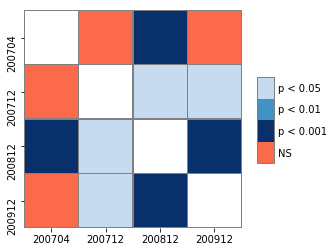

In [49]:
pc = sp.posthoc_conover(ccss,val_col='index1',group_col='time',p_adjust='bonferroni')
cmap = ['1','#fb6a4a','#08306b','#4292c6','#c6dbef']
heatmap_args = {'cmap':cmap, 'linewidths':0.25,'linecolor':'0.5',
                'clip_on':False,'square':True,'cbar_ax_bbox':[0.80,0.35,0.04,0.3]}
sp.sign_plot(pc,**heatmap_args);

# 非参数检验 
- <font color='red'>总体的分布位置/形状进行估计或假设检验</font>
    - 分布类型/形状的检验：检验样本所在总体是否服从已知的理论分布
    - 分布位置检验：检验样本所在总体的分布位置（集中趋势）是否相同

- Wilcoxon两样本秩和检验
    - **H0:两总体所在的中心位置相同**，中位数可以代表中心位
    - 考察各组秩和的大小是否明显偏离H0
- Mann-Whitney U
    - 基本等价于两样本秩和检验
    - 可近似理解为基于秩次进行了两样本t检验
- Kolmogorov-Smirnov Z
    - 两样本K-S检验，检验效能不高
    - 考察的是**整体分布是否相同**，而不是只针对中心位置
- Kruskal-Wallis H检验
    - 本质上就是**基于秩次的单因素方差分析**，可用于两组或多组

## Independent population
- Two populations
```Python
scipy.stats.median_test()           # 中位数检验，两组或多组均可以使用
scipy.stats.ranksums(a,b)           # wilcox秩和检验，相对使用较少
scipy.stats.mannwhitneyu(a,b,use_continuity,alternative) # Mann-Whitney U检验，使用中一般直接代替Wilcox秩和检验
scipy.stats.ks_2samp(data1,data2)        # 两样本KS检验
```
- More than two populations
```Python
scipy.stats.kruskal(sample1,sample2,....,nan_policy='propagate')   # propagate,raise,omit
```

In [50]:
ss.mannwhitneyu(ccss.Qa3[ccss.s7=='未婚'],ccss.Qa3[ccss.s7=='已婚'])

MannwhitneyuResult(statistic=121516.5, pvalue=0.0016970638386570689)

In [51]:
ss.ranksums(ccss.Qa3[ccss.s7=='未婚'],ccss.Qa3[ccss.s7=='已婚'])

RanksumsResult(statistic=2.7604079036339764, pvalue=0.005772923211835386)

In [52]:
ss.median_test(ccss.Qa3[ccss.s7=='未婚'],ccss.Qa3[ccss.s7=='已婚'])

(2.6726310409335143, 0.10208713262673606, 100.0, array([[158, 321],
        [185, 469]]))

In [53]:
ss.ks_2samp(ccss.Qa3[ccss.s7=='未婚'],ccss.Qa3[ccss.s7=='已婚'])

Ks_2sampResult(statistic=0.07164630770934052, pvalue=0.1647598251581164)

In [54]:
ss.kruskal(ccss.query("s0=='北京' & time == '200704'").Qa3,
           ccss.query("s0=='北京' & time == '200712'").Qa3,
           ccss.query("s0=='北京' & time == '200812'").Qa3,
           ccss.query("s0=='北京' & time == '200912'").Qa3)

KruskalResult(statistic=11.773756778518651, pvalue=0.008199757256201149)

## Dependent population
- Two populations
```Python
scipy.stats.willcoxon(a,b,zero_method='wilcox',correction=False)
# zero_method: pratt: 检验中包括0差值， wilcox:丢弃0差值，  zsplit:将0差值对半分入两组  
```
- More than two populations
```Python
scipy.stats.friedmanchisquare(measurement1,measurement2,measurement3)
# friedman卡方检验，至少需要提供三组数据
```

In [55]:
ss.wilcoxon(ccss_p.Qa4,ccss_p.Qa4n)

WilcoxonResult(statistic=414.0, pvalue=0.02601583794073107)

### Wilcoxon Signed Rank Test

In [2]:
Twin = pd.read_excel('data/Statistic Practice Data.xlsx',sheet_name='Twin')

In [3]:
Twin['diff'] = Twin['Older'] - Twin['Younger']
Twin['diff'][Twin['diff']==0]

4    0
Name: diff, dtype: int64

In [12]:
ss.wilcoxon(Twin['diff'],zero_method='wilcox',correction=False)

WilcoxonResult(statistic=18.5, pvalue=0.35832646674888025)

In [14]:
ss.wilcoxon(Twin['Older'], Twin['Younger'],zero_method='zsplit',correction=False)

WilcoxonResult(statistic=22.0, pvalue=0.32758632833257006)

In [15]:
horse = pd.read_excel('data/Statistic Practice Data.xlsx',sheet_name='horse')
horse.head()

,site1,site2
0,50.6,38.0
1,39.2,18.6
2,35.2,23.2
3,17.0,19.0
4,11.2,6.6


In [18]:
ss.wilcoxon(horse['site1'], horse['site2'],zero_method='zsplit',correction=True)

WilcoxonResult(statistic=6.0, pvalue=0.0580240199462214)

In [56]:
ss.stats.friedmanchisquare(ccss.query("s0=='北京' & time == '200704'").Qa4[:10],
                              ccss.query("s0=='北京' & time == '200712'").Qa4[:10],
                              ccss.query("s0=='北京' & time == '200812'").Qa4[:10],
                              ccss.query("s0=='北京' & time == '200912'").Qa4[:10])

FriedmanchisquareResult(statistic=5.833333333333344, pvalue=0.12000654765321411)